In [93]:
import pickle
import matplotlib.pyplot as plt

In [50]:
# load data for gateway failure
with open("log_sensorboards_gf_1.pkl", "rb") as f:
    data = pickle.load(f)


In [51]:
print(len(data[0]), len(data[1]), len(data[2]), len(data[3]))
primary_board_ind = 1
redundant_board_ind = 3

0 83 0 19


In [52]:
data[1]

[((637.489990234375,
   0.0,
   49.79620361328125,
   1031.674072265625,
   21.0,
   8.5,
   21.0,
   17.0,
   20.5,
   18.5,
   20.80000114440918,
   15.699999809265137,
   -157.0,
   0,
   0,
   0,
   94420780),
  94420780,
  0,
  -97,
  15,
  15,
  [2023, 3, 6, 17, 4, 35]),
 ((666.2899780273438,
   0.0,
   36.88019943237305,
   1031.6551513671875,
   21.0,
   8.699999809265137,
   21.0,
   17.100000381469727,
   20.5,
   18.600000381469727,
   20.80000114440918,
   15.800000190734863,
   -82.0,
   0,
   0,
   1,
   94420780),
  94420780,
  1,
  -89,
  28,
  28,
  [2023, 3, 6, 17, 4, 48]),
 ((685.489990234375,
   0.0,
   27.504497528076172,
   1031.6978759765625,
   21.0,
   8.600000381469727,
   21.0,
   17.100000381469727,
   20.600000381469727,
   18.600000381469727,
   20.80000114440918,
   15.800000190734863,
   -80.0,
   0,
   0,
   2,
   94420780),
  94420780,
  2,
  -90,
  41,
  41,
  [2023, 3, 6, 17, 5, 1]),
 ((681.9199829101562,
   0.0,
   24.428096771240234,
   1031.647216

In [53]:
data[3]

[((-1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -86.0,
   0,
   0,
   0,
   3903892222),
  3903892222,
  0,
  -88,
  62,
  62,
  [2023, 3, 6, 17, 5, 22]),
 ((-1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -87.0,
   0,
   0,
   0,
   3903892222),
  3903892222,
  0,
  -89,
  122,
  122,
  [2023, 3, 6, 17, 6, 22]),
 ((-1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -86.0,
   0,
   0,
   0,
   3903892222),
  3903892222,
  0,
  -88,
  182,
  182,
  [2023, 3, 6, 17, 7, 22]),
 ((-1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -92.0,
   0,
   0,
   0,
   3903892222),
  3903892222,
  0,
  -92,
  243,
  243,
  [2023, 3, 6, 17, 8, 23]),
 ((-1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -85.0,
   0

In [54]:
data_format = ('payload', 'board_id', 'pkt_no', 'RSSI', 'Tx_time', 'reTx_time', 'rx_time' )

In [55]:
### Number of Packets received by primary board and redundant board
print('Primary Board:', len(data[1]))
print('Redundant Board:', len(data[3]))

Primary Board: 83
Redundant Board: 19


In [56]:
### check if all packets belong to same board
### PB
pb_id = 0
rb_id = 0
for d_i, d in enumerate(data[1]):
    if d_i == 0:
        pb_id = d[1]
        print('PB Id:',pb_id) 
    assert(data[1][0][1]==d[1])
### RB
for d_i, d in enumerate(data[3]):
    if d_i == 0:
        rb_id = d[1]
        print('RB Id:', rb_id)
    assert(data[3][0][1]==d[1])

PB Id: 94420780
RB Id: 3903892222


#### Checking the confidence interval (40s)


In [57]:
data_all = data[1] + data[3]

In [58]:
len(data_all)

102

In [59]:
for d in data_all:
    if d[5]-d[4]>0:
        #print(d[1],d[4:6], d[5]-d[4])
        print('packets outside conf. interval', d)
        

#### PRR of the sensor node as whole (PB+RB)

In [60]:
### filter hb signals
hb_pkts = []
data_pkts = []
board_index = [1,3]

for i in board_index:
    each_board = data[i]
    for d in each_board:
        #print(d[0][0])
        if d[0][0] == -1:
            hb_pkts += [d]
        else:
            data_pkts += [d]
            

In [61]:
### PRR of the sesnor node (PB+RB)
packet_num = []
num_pkts_sent = 0 
num_pkts_rx = 0
for d in data_pkts:
    if d[2] not in packet_num:
        packet_num += [d[2]]
num_pkts_sent = max(packet_num)
num_pkts_rx = len(packet_num)
prr_sn = (num_pkts_rx/num_pkts_sent) * 100
print('PRR of the sensor node:', prr_sn)

PRR of the sensor node: 101.21951219512195


In [105]:
packet_num

[0,
 1,
 2,
 7,
 8,
 11,
 13,
 15,
 22,
 26,
 31,
 33,
 35,
 38,
 42,
 45,
 46,
 47,
 49,
 50,
 52,
 54,
 55,
 57,
 59,
 60,
 61,
 62,
 65,
 66,
 3,
 4,
 5,
 9,
 12,
 14,
 16,
 17,
 18,
 24,
 27,
 28,
 29,
 30,
 34,
 36,
 39,
 43,
 48,
 51,
 56,
 58,
 63]

#### Average RSSI of Redundant Gateway

In [62]:
import numpy as np

In [63]:
data_all = data[1] + data[3]

In [64]:
len(data_all) == (len(data[1]) + len(data[3]))

True

In [65]:
### filter hb signals
hb_pkts = []
data_pkts = []
board_index = [1,3]

for i in board_index:
    each_board = data[i]
    for d in each_board:
        #print(d[0][0])
        if d[0][0] == -1:
            hb_pkts += [d]
        else:
            data_pkts += [d]

In [66]:
rssi_data = []
for d in data_all:
    rssi_data += [d[3]]

In [67]:
len(rssi_data)

102

In [68]:
avg_rssi = np.mean(rssi_data)

In [69]:
avg_rssi

-92.09803921568627

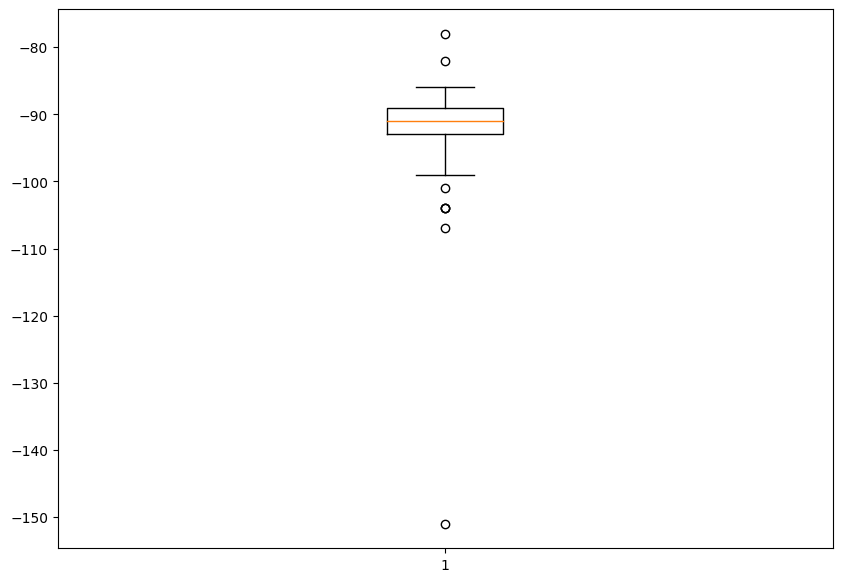

In [70]:
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(rssi_data)
# show plot
plt.show()

#### Average RSSI of regular gateway

In [32]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# load data for gateway failure
with open("log_sensorboards_1.pkl", "rb") as f:
    data_sf = pickle.load(f)
    

In [37]:
print(len(data_sf[0]), len(data_sf[1]), len(data_sf[2]), len(data_sf[3]))
primary_board_ind = 1
redundant_board_ind = 3

0 80 0 20


In [38]:
data_sf

[[],
 [((639.0,
    0.0,
    28.835163116455078,
    1031.80419921875,
    20.5,
    9.699999809265137,
    20.700000762939453,
    17.80000114440918,
    20.30000114440918,
    18.899999618530273,
    20.600000381469727,
    16.200000762939453,
    -157.0,
    0,
    0,
    0,
    94420780),
   94420780,
   0,
   -96,
   19,
   19,
   [2023, 3, 6, 16, 39, 31]),
  ((634.530029296875,
    0.0,
    25.38031578063965,
    1031.787109375,
    20.5,
    9.699999809265137,
    20.700000762939453,
    17.700000762939453,
    20.30000114440918,
    18.899999618530273,
    20.600000381469727,
    16.200000762939453,
    -47.0,
    0,
    0,
    1,
    94420780),
   94420780,
   1,
   -96,
   35,
   35,
   [2023, 3, 6, 16, 39, 47]),
  ((647.8800048828125,
    0.0,
    24.354848861694336,
    1031.8123779296875,
    20.5,
    9.5,
    20.80000114440918,
    17.700000762939453,
    20.399999618530273,
    18.899999618530273,
    20.600000381469727,
    16.200000762939453,
    -48.0,
    0,
    0,


In [40]:
exp_data = [data_sf]
data_all = []
for de in exp_data:
    data = de[1] + de[3]
    data_all.extend(data)
#data_all.extend(data_hf[1]+data_hf[2])

#assert(len(data_all) == ( len(data_hf[1])+len(data_hf[2]) + len(data_sf[1])+len(data_sf[3]) + len(data_svf[1])+len(data_svf[3]) )) 
assert(len(data_all) == ( len(data_sf[1])+len(data_sf[3]) )) 

In [41]:
len(data_all)

100

In [42]:
### filter hb signals
hb_pkts_sf = []
data_pkts_sf = []
board_index = [1,3]

for i in board_index:
    each_board = data_sf[i]
    for d in each_board:
        print(d)
        #print(d[0][0])
        if d[0][0] == -1: ### check hb indicator and board id
            hb_pkts_sf += [d]
        else:
            data_pkts_sf += [d]

((639.0, 0.0, 28.835163116455078, 1031.80419921875, 20.5, 9.699999809265137, 20.700000762939453, 17.80000114440918, 20.30000114440918, 18.899999618530273, 20.600000381469727, 16.200000762939453, -157.0, 0, 0, 0, 94420780), 94420780, 0, -96, 19, 19, [2023, 3, 6, 16, 39, 31])
((634.530029296875, 0.0, 25.38031578063965, 1031.787109375, 20.5, 9.699999809265137, 20.700000762939453, 17.700000762939453, 20.30000114440918, 18.899999618530273, 20.600000381469727, 16.200000762939453, -47.0, 0, 0, 1, 94420780), 94420780, 1, -96, 35, 35, [2023, 3, 6, 16, 39, 47])
((647.8800048828125, 0.0, 24.354848861694336, 1031.8123779296875, 20.5, 9.5, 20.80000114440918, 17.700000762939453, 20.399999618530273, 18.899999618530273, 20.600000381469727, 16.200000762939453, -48.0, 0, 0, 2, 94420780), 94420780, 2, -98, 51, 51, [2023, 3, 6, 16, 40, 3])
((665.030029296875, 0.0, 23.75665855407715, 1031.754638671875, 20.600000381469727, 9.5, 20.80000114440918, 17.600000381469727, 20.399999618530273, 18.899999618530273, 2

In [43]:
len(hb_pkts_sf)+len(data_pkts_sf)==len(data_sf[1])+len(data_sf[3])

True

In [45]:
### PRR of the sesnor node (PB+RB)
packet_num_sf = []
num_pkts_sent_sf = 0 
num_pkts_rx_sf = 0
for d in data_pkts_sf:
    if d[2] not in packet_num_sf:
        packet_num_sf += [d[2]]
num_pkts_sent_sf = max(packet_num_sf)
num_pkts_rx_sf = len(packet_num_sf)
prr_sn_sf = (num_pkts_rx_sf/num_pkts_sent_sf) * 100
print('PRR of the sensor node:', prr_sn_sf)

PRR of the sensor node: 101.26582278481013


In [46]:
packet_num_sf

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79]

In [47]:
rssi_data_rest = []
for d in data_all:
    rssi_data_rest += [d[3]]

In [48]:
np.mean(rssi_data_rest)

-98.06

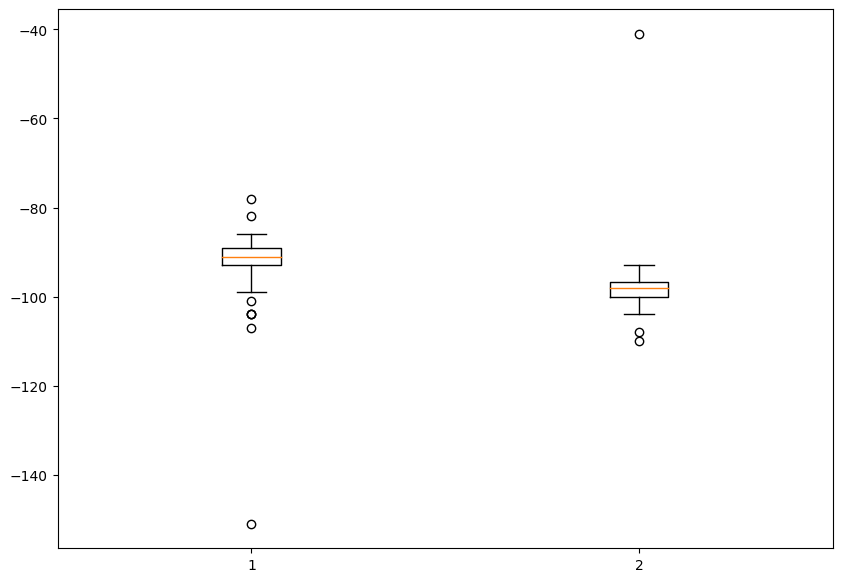

In [71]:
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot([rssi_data, rssi_data_rest])
# show plot
plt.show()